# 数据聚合与分组计算

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn

In [2]:
df=pd.DataFrame({'key1':list('aabba'),
                'key2':['one','two','one','two','one'],
                'data1':randn(5),
                'data2':randn(5)})
means=df.groupby(['key1','key2'])['data1'].mean()
means

key1  key2
a     one     0.046245
      two    -0.945299
b     one     0.450544
      two    -1.384986
Name: data1, dtype: float64

In [4]:
means.unstack(level=0)

key1,a,b
key2,,
one,0.046245,0.450544
two,-0.945299,-1.384986


In [5]:
states=np.array(['o','c','c','o','o'])   #分组键可以是任何长度适当的数组
years=np.array([2005,2005,2006,2005,2006])
df.groupby([states,years])['data1'].mean()  #此处state,years无引号

c  2005   -0.945299
   2006    0.450544
o  2005   -0.608781
   2006   -0.074933
Name: data1, dtype: float64

In [6]:
df.groupby(['key1','key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [7]:
for (k1,k2),group in df.groupby(['key1','key2']):
    print k1,k2
    print group

a one
      data1     data2 key1 key2
0  0.167423 -0.250631    a  one
4 -0.074933  0.207993    a  one
a two
      data1     data2 key1 key2
1 -0.945299  1.467469    a  two
b one
      data1    data2 key1 key2
2  0.450544  0.00904    b  one
b two
      data1    data2 key1 key2
3 -1.384986  0.37883    b  two


In [9]:
pieces=dict(list(df.groupby('key1')))  #必须变为list才能dict

In [23]:
pieces['a']

,data1,data2,key1,key2
0,0.167423,-0.250631,a,one
1,-0.945299,1.467469,a,two
4,-0.074933,0.207993,a,one


In [22]:
all_code=[('a','ab'),('b','ab')]
dict(x for x in all_code)

{'a': 'ab', 'b': 'ab'}

In [25]:
dict(zip(range(7),reversed(range(7))))

{0: 6, 1: 5, 2: 4, 3: 3, 4: 2, 5: 1, 6: 0}

In [29]:
grouped=df.groupby(df.dtypes,axis=1)  #可以横向分组
s=dict(list(grouped))
s

{dtype('float64'):       data1     data2
 0  0.167423 -0.250631
 1 -0.945299  1.467469
 2  0.450544  0.009040
 3 -1.384986  0.378830
 4 -0.074933  0.207993, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

In [4]:
tips=pd.read_csv('pydata-book-2nd-edition/examples/tips.csv')
tips['tip_pct']=tips['tip']/tips['total_bill']
def top(df,n=5,column='tip_pct'):
    return df.sort_values(by=column)[-n:]


In [5]:
top(tips,n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [6]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [8]:
tips.groupby(['smoker','day']).apply(top,n=1,column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [10]:
frame=pd.DataFrame({'data1':randn(1000),
                   'data2':randn(1000)})
factor=pd.cut(frame.data1,4)   #相当于创建了一个可以用于分组的标签
def getx(group):
    return {'min':group.min(),'max':group.max(),'count':group.count(),'mean':group.mean()}

frame.groupby(factor)['data2'].apply(getx).unstack()

,count,max,mean,min
data1,,,,
"(-3.222, -1.641]",46.0,1.373771,-0.118712,-1.760631
"(-1.641, -0.0662]",452.0,3.197478,-0.002727,-2.919943
"(-0.0662, 1.509]",444.0,3.296772,0.004995,-3.049451
"(1.509, 3.083]",58.0,2.946692,-0.002364,-1.782274


In [14]:
factor1=pd.qcut(frame.data1,10)
frame.groupby(factor1)['data1'].apply(getx).unstack()

,count,max,mean,min
data1,,,,
"(-3.217, -1.252]",100.0,-1.254071,-1.723476,-3.215705
"(-1.252, -0.827]",100.0,-0.829257,-1.023254,-1.251839
"(-0.827, -0.562]",100.0,-0.562749,-0.683511,-0.826816
"(-0.562, -0.3]",100.0,-0.300878,-0.419176,-0.561328
"(-0.3, -0.0641]",100.0,-0.064737,-0.172516,-0.299377
"(-0.0641, 0.197]",100.0,0.194478,0.060733,-0.063484
"(0.197, 0.463]",100.0,0.460831,0.332603,0.200212
"(0.463, 0.747]",100.0,0.746339,0.600453,0.466670
"(0.747, 1.222]",100.0,1.221885,0.962397,0.749472


In [15]:
states=list('ONVFonci')
group_key=['East']*4+['West']*4
data=pd.Series(randn(8),index=states)
data[['V','n','i']]=np.nan
data

O   -0.570593
N   -0.399432
V         NaN
F   -0.059982
o    0.089937
n         NaN
c    0.630109
i         NaN
dtype: float64

In [16]:
fill_value=lambda x: x.fillna(x.mean())
data.groupby(group_key).apply(fill_value)

O   -0.570593
N   -0.399432
V   -0.343336
F   -0.059982
o    0.089937
n    0.360023
c    0.630109
i    0.360023
dtype: float64

In [17]:
fill_dict={'East':0.5,'West':-1}
groupx=lambda x: x.fillna(fill_dict[x.name])  #此处x.name表示的是分组后的组名
data.groupby(group_key).apply(groupx)

O   -0.570593
N   -0.399432
V    0.500000
F   -0.059982
o    0.089937
n   -1.000000
c    0.630109
i   -1.000000
dtype: float64

# 雅虎财政分析（读入日期）

In [37]:
close_px=pd.read_csv('pydata-book-2nd-edition/examples/stock_px.csv',
                     parse_dates=True,index_col=0)   #读入日期的重要方式
close_px.head()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-02-01,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12
1990-02-02,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24
1990-02-05,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25
1990-02-06,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23
1990-02-07,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33


In [40]:
rets=close_px.pct_change().dropna()  #pct_change()和diff()没有什么区别，除的是前一项
spx_corr=lambda x:x.corrwith(x['SPX'])
by_year=rets.groupby(lambda x:x.year)   #close_px.index.year 直接取了年份
by_year.apply(spx_corr).head()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990,0.595024,0.545067,0.752187,0.738361,0.801145,0.586691,0.783168,1.0,0.517586
1991,0.453574,0.365315,0.759607,0.557046,0.646401,0.524225,0.641775,1.0,0.569335
1992,0.398180,0.498732,0.632685,0.262232,0.515740,0.492345,0.473871,1.0,0.318408
1993,0.259069,0.238578,0.447257,0.211269,0.451503,0.425377,0.385089,1.0,0.318952
1994,0.428549,0.268420,0.572996,0.385162,0.372962,0.436585,0.450516,1.0,0.395078


In [47]:
by_year.apply(lambda x: x['AAPL'].corr(x['MSFT']))

1990    0.408271
1991    0.266807
1992    0.450592
1993    0.236917
1994    0.361638
1995    0.258642
1996    0.147539
1997    0.196144
1998    0.364106
1999    0.329484
2000    0.275298
2001    0.563156
2002    0.571095
2003    0.486262
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

In [52]:
import statsmodels.api as sm
def regress(data,yvar,xvars):
    Y=data[yvar]
    X=data[xvars]
    X['intercept']=1
    result=sm.OLS(Y,X).fit()
    return result.params


C:\Users\lenovo\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [55]:
by_year.apply(regress,'AAPL',['SPX'])   #'SPX'外必须要加上[]

,SPX,intercept
1990,1.512772,0.001395
1991,1.187351,0.000396
1992,1.832427,0.000164
1993,1.390470,-0.002657
1994,1.190277,0.001617
1995,0.858818,-0.001423
1996,0.829389,-0.001791
1997,0.749928,-0.001901
1998,1.164582,0.004075
1999,1.384989,0.003273


# 透视表和交叉表

In [57]:
tips.pivot_table(['tip_pct','size'],index='day',columns='smoker',margins=True)
#margins=True 就是添加了总和(ALL)的行和列

size                       tip_pct                    
smoker        No       Yes       All        No       Yes       All
day                                                               
Fri     2.250000  2.066667  2.105263  0.151650  0.174783  0.169913
Sat     2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
Sun     2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
Thur    2.488889  2.352941  2.451613  0.160298  0.163863  0.161276
All     2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

# 2012联邦选举委员会数据库

In [2]:
fec=pd.read_csv('pydata-book-2nd-edition/datasets/fec/P00000001-ALL.csv')
fec.head()

C:\Users\lenovo\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [3]:
unique_cands=fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [4]:
parties={'Bachmann, Michelle':'Republican', 
'Romney, Mitt':'Republican', 
'Obama, Barack':'Democrat',
"Roemer, Charles E. 'Buddy' III" :'Republican', 
'Pawlenty, Timothy':'Republican',
'Johnson, Gary Earl':'Republican', 
'Paul, Ron':'Republican', 
'Santorum, Rick':'Republican', 
'Cain, Herman':'Republican',
'Gingrich, Newt':'Republican', 
'McCotter, Thaddeus G':'Republican', 
'Huntsman, Jon':'Republican',
'Perry, Rick':'Republican'}

In [5]:
fec['party']=fec.cand_nm.map(parties)   #添加新的'party'这一列
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [6]:
fec=fec[fec.contb_receipt_amt>0]
fec_mrbo=fec[fec.cand_nm.isin(['Obama, Barack','Romney, Mitt'])]
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [7]:
s=pd.Series(fec.contbr_occupation.unique())
s

0                                     RETIRED
1                       INFORMATION REQUESTED
2                                          RN
3                         ELECTRICAL ENGINEER
4                              LAND DEVELOPER
5                                   PHYSICIAN
6                     OFFICE FURNITURE BROKER
7                                     MANAGER
8                                     REALTOR
9                                       OWNER
10                           MANDARIN TEACHER
11                                  PRESIDENT
12                         FREELANCE ANIMATOR
13                            GENERAL MANAGER
14                                   ATTORNEY
15                                        CEO
16                                  EXECUTIVE
17                                        CPA
18                               FARM MANAGER
19                                   INVESTOR
20                             BUSINESS OWNER
21                                

In [8]:
occ_mapping={'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDED',
            'INFORMATION REQUESTED':'NOT PROVIDED',
            'INFORMATION REQUISTED (BEST EFFORTS)':'NOT PROVIDED',
            'C.E.O.':'CEO'}

In [9]:
f=lambda x:occ_mapping.get(x,x)   #dict.get表示如果没有提供相关映射，则返回x
fec.contbr_occupation=fec.contbr_occupation.map(f)

In [10]:
emp_mapping={'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
            'INFORMATION REQUESTED':'NOT PROVIDED',
             'SELF':'SELF-EMPLOYED',
             'SELF EMPLOYED':'SELF-EMPLOYED'}
f=lambda x:emp_mapping.get(x,x)
fec.contbr_employer=fec.contbr_employer.map(f)

In [11]:
by_occupation=fec.pivot_table('contb_receipt_amt',index='contbr_occupation',
                             columns='party',aggfunc='sum')
over_2mm=by_occupation[by_occupation.sum(1)>2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


<IPython.core.display.Javascript object>


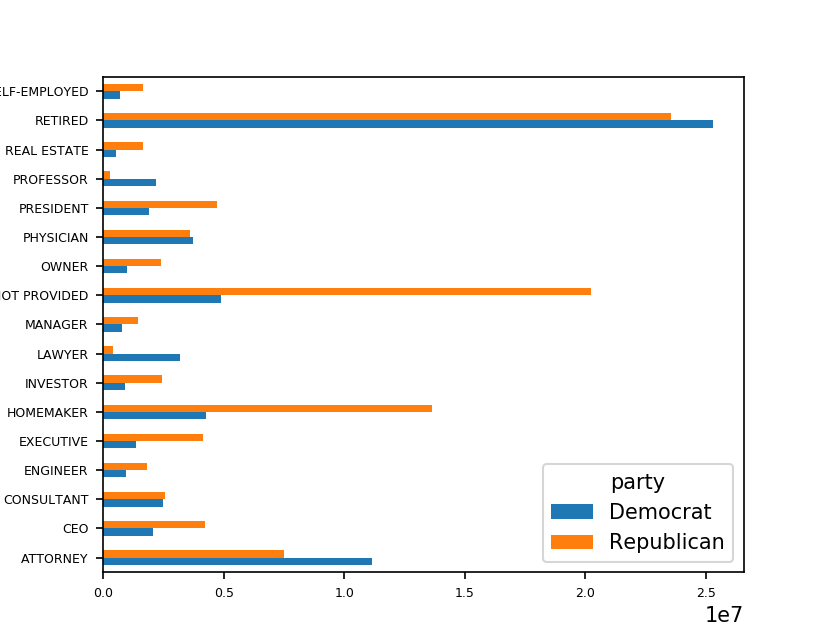

In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
over_2mm.plot(kind='barh',fontsize=6)

In [13]:
def get_top_amounts(group,key,n=5):
    totals=group.groupby(key)['contb_receipt_amt'].sum()
    return totals.sort_values(ascending=False)[:n]
grouped=fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts,'contbr_occupation',n=7)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [14]:
bins=np.array([0,1,10,100,1000,10000,100000,1000000,10000000])
labels=pd.cut(fec_mrbo.contb_receipt_amt,bins)
labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
421           (10, 100]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426         (100, 1000]
427       (1000, 10000]
428         (100, 1000]
429         (100, 1000]
430           (10, 100]
431       (1000, 10000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
436         (100, 1000]
437           (10, 100]
438         (100, 1000]
439         (100, 1000]
440           (10, 100]
              ...      
701356        (10, 100]
701357          (1, 10]
701358        (10, 100]
701359        (10, 100]
701360        (10, 100]
701361        (10, 100]
701362      (100, 1000]
701363        (10, 100]
701364        (10, 100]
701365        (10, 100]
701366        (1

In [16]:
grouped=fec_mrbo.groupby(['cand_nm',labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [18]:
bucket_sums=grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [19]:
normed_sums=bucket_sums.div(bucket_sums.sum(axis=1),axis=0)

In [20]:
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


<IPython.core.display.Javascript object>


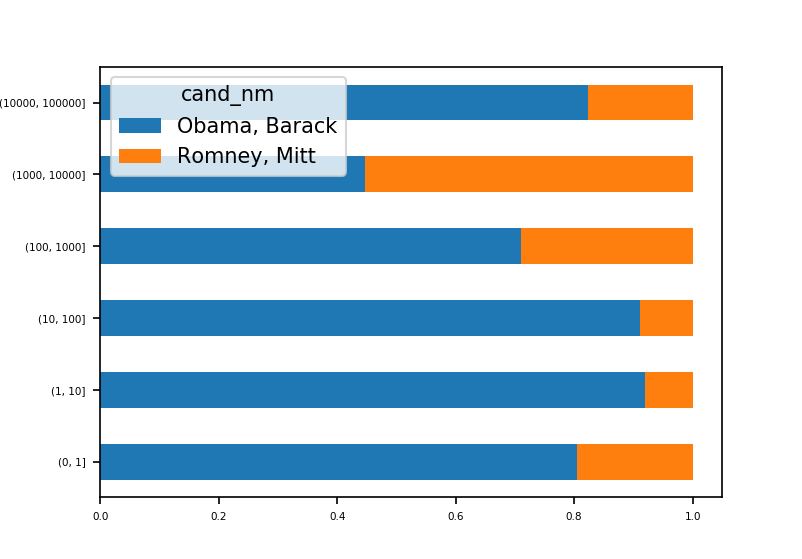

In [22]:
normed_sums[:-2].plot(kind='barh',stacked=True,fontsize=5)

In [46]:
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party,party1
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,NOT PROVIDED,NOT PROVIDED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican,Republican


### 赞助数>1000前十的州的做法

In [51]:
grouped=fec_mrbo.groupby(['cand_nm','contbr_st'])
total=grouped.size().dropna()
total=total[total>1000].unstack(0)


In [56]:
O10=total['Obama, Barack'].sort_values(ascending=False)[:10]
O10

contbr_st
CA    100182.0
NY     50383.0
IL     33240.0
TX     32292.0
FL     29797.0
MA     24864.0
MD     22552.0
VA     21451.0
WA     20783.0
PA     19280.0
Name: Obama, Barack, dtype: float64

In [57]:
R10=total['Romney, Mitt'].sort_values(ascending=False)[:10]
R10

contbr_st
CA    13357.0
FL     8536.0
NY     7963.0
UT     7027.0
TX     6822.0
MA     5199.0
VA     4279.0
IL     3458.0
AZ     3211.0
NJ     2993.0
Name: Romney, Mitt, dtype: float64

In [63]:
OR10=pd.concat([O10,R10],axis=1)

<IPython.core.display.Javascript object>


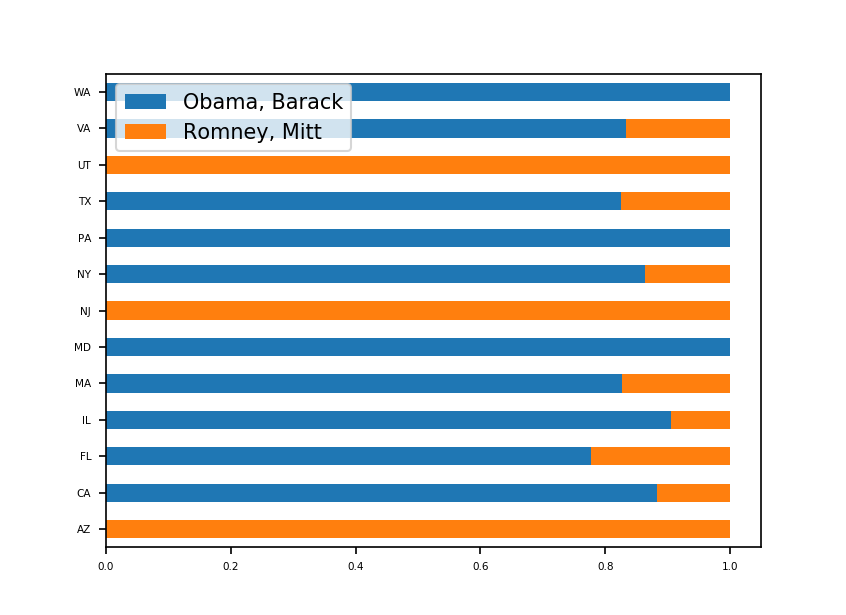

In [66]:
OR_pct=OR10.div(OR10.sum(1),axis=0)
OR_pct.plot(kind='barh',fontsize=5,stacked=True)

### 根据州统计赞助信息

In [74]:
totals=grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals1=totals.sum(1).sort_values(ascending=False)[:10]
totals1.index


Index([u'CA', u'NY', u'IL', u'FL', u'TX', u'MA', u'VA', u'NJ', u'MD', u'PA'], dtype='object', name=u'contbr_st')

In [81]:
totals10=totals.loc[totals1.index]

<IPython.core.display.Javascript object>


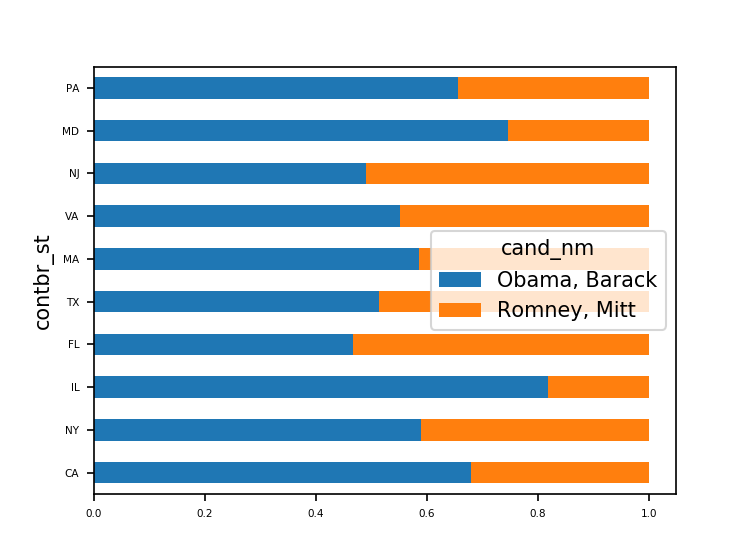

In [82]:
normed_data=totals10.div(totals10.sum(1),axis=0)
normed_data.plot(kind='barh',stacked=True,fontsize=5)